# Prerequisites

- Lattice theory
- Vector spaces

# Theory

**Task**  
The main goal is to find a better basis for our lattice space. Better = the vectors are shorter and more orthogonal. This can be done using the LLL algorithm. This section explores the LLL algorithm and others similar to it. 

*Intuition:* Since the volume of the lattice is fixed whenever our vectors become shorter they become more orthogonal to each other.

## Vector projection

https://en.wikipedia.org/wiki/Vector_projection

$a_1$ is a projection of $a$ on $b$

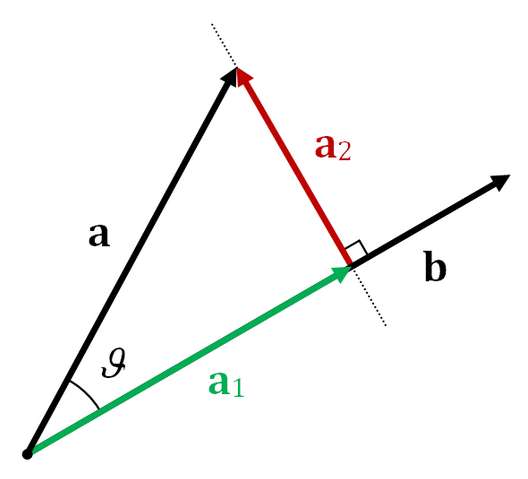
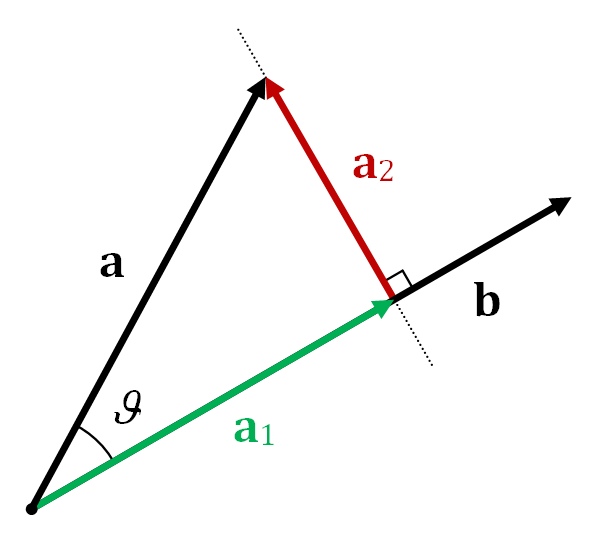

**Scalar projection**  
$\alpha_1 =  \dfrac {a \cdot b} {\|b\|}$ = scalar. We use this to scale the projection.

**Vector projection**  
$a_1 = \alpha_1 \cdot \hat{b}$ where $\hat{b} = \dfrac 1 {\|b\|} b$ is the unit vector. The unit vector gives the direction of $b$.

Therefore $a_1 = \underbrace{ \cfrac {a \cdot b} {\|b\|} }_{\text{scalar}} \underbrace{ \cdot \cfrac 1 {\|b\|} }_{\text{scalar}} \underbrace{b}_{\text{vector}} = \dfrac {a \cdot b} {\|b\|^2}b$


**Remark**
- The euclidean algorithm ($\gcd$) is just a lattice reduction in $\mathbb{R}$



## Gaussian lattice reduction

Let
-  $\mathcal{L} \subset \mathbb{R}^2$ 
- $v_1, v_2 \in \mathcal{L}$, be a basis with $\|v_1\| < \|v_2\|$ 
- Let $\mu_{2,1} = \cfrac{v_1 \cdot v_2}{\|v_1\|^2}$

*Stop Conditions*
- $\begin{cases}
\|v_1\| < \|v_2\| \\
\|v_2\| < \|v_1 + v_2\| \text{ Addition won't change } v_2
\end{cases} \iff
\begin{cases}
\|v_1\|^2 < \|v_2^*\|^2 + \mu^2\|v_1\|^2 \\
|\mu| \leq \dfrac 1 2
\end{cases} $ 

**Algorithm**
- while $\lfloor \mu_{2,1} \rceil \neq 0$
    - if $\|v_1\| > \|v_2\|$ swap them
    - $\mu_{2,1} = \cfrac{v_1 \cdot v_2}{\|v_1\|^2}$
    - $v_2 = v_2 - \lfloor \mu_{2,1} \rceil v_1$ #Projection
    
    
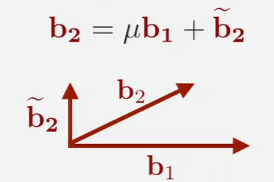

In [1]:
v1= vector([66586820,65354729])
v2= vector([6513996,6393464])

In [2]:
def glr(v1, v2):
    mu = -2
    while round(mu):
        if v1.norm() > v2.norm():
            v1, v2 = v2, v1
        mu = v1 * v2 / (v1.norm()**2)
        v2 = v2 - round(mu) * v1
    return v1, v2

In [3]:
glr(v1, v2)

((2280, -1001), (-1324, -2376))

## Gram schmidt

- https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process

Let $\mathcal{B} = \{v_1, v_2, ... , v_n\}$ be a basis for a space  
An orthogonal basis $\mathcal{B^*} = \{v_1^*, v_2^*, ... , v_n^*\}$ is a basis where all the vectors are pairwise orthogonal  
$\mathcal{B} = M\mathcal{B^*}$ where $M$ is the change of base matrix

$
M = 
\begin{bmatrix}
1 & 0 & 0 & ... & 0 & 0 \\
\mu_{2,1} & 1 & 0 & ... & 0 & 0 \\
\mu_{3,1} & \mu_{3,2} & 1 & ... & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
\mu_{n,1} & \mu_{n,2} & \mu_{n,3} & ... & \mu_{n,n-1} & 1 
\end{bmatrix}$

In [4]:
B = random_matrix(QQ, 4, 4)
B

[   0   -2    0  1/2]
[  -2    0    0   -1]
[   2    2 -1/2    0]
[  -1    0    1    0]

In [6]:
B_, M = B.gram_schmidt()
B_, M, M * B_

(
[     0     -2      0    1/2]  [     1      0      0      0]
[    -2  -4/17      0 -16/17]  [ -2/17      1      0      0]
[  4/21  -2/21   -1/2  -8/21]  [-16/17 -19/21      1      0]
[  4/37  -2/37   8/37  -8/37], [     0  17/42 -58/37      1],

[   0   -2    0  1/2]
[  -2    0    0   -1]
[   2    2 -1/2    0]
[  -1    0    1    0]
)

## Hadamard's inequaility

For a lattice $\mathcal{L}$ with a basis $(v_1, ..., v_n)$ let $\mathcal{F}$ be the fundamental domain. Then 
$$\det(\mathcal{L}) = Vol(\mathcal{F}) \leq \|v_1\|\cdot \|v_2\| \cdot ... \cdot \|v_n\|$$
- The closer this is an equality the closest it is the basis orthogonal

**Hadamard's ratio**  
For a lattice $\mathcal{L}$ with a basis $\mathcal{B} = (v_1, ..., v_n)$ let $\mathcal{F}$ be the fundamental domain. The Hadamard ratio is defined as:

$$\mathcal{H}(\mathcal{B}) = \left( \dfrac {\det(\mathcal{L})} {\|v_1\|\cdot \|v_2\| \cdot ... \cdot \|v_n\|} \right)^{\frac 1 n}$$

- $0 < \mathcal{H} \leq 1$ 

In [7]:
# We can use Hadamard's ration to check orthogonality of a lattice basis

In [8]:
def hadamards_ratio(B):
    H = (abs(B.determinant()) / prod([v.norm() for v in B])) ** (1/B.nrows())
    #H = (np.abs(np.linalg.det(v)) / np.prod([np.linalg.norm(v_i) for v_i in v.T])) ** (1/v.shape[1])
    return H.n()

In [9]:
B_ = B.LLL()

In [10]:
hadamards_ratio(B).n(), hadamards_ratio(B_)

(0.480722710990513, 0.992450563509793)

## LLL

Given a basis $\mathcal{B} = \{v_1, v_2, ... , v_n\}$ we want to find a "better" basis. What does "better" mean?
1. short vectors
2. as orthogonal as possible

Let $\mathcal{B}^* = \{v^∗_1,v^∗_2,...,v^∗_n\} = $ basis for $span(\mathcal{B})$ constructed using Gram Schmidt

**Property**  
$\det(\mathcal{L}) = \det(F) = \det(F^*) = {\prod^n_{i=1}||v_i^*||}$

**LLL Reduced**  
$\mathcal{B}$ is  LLL reduced $\iff$
- Size condition $|\mu_{i,j}| = \cfrac{|v_i \cdot v_i^*|} {\|v_j^*\|^2} \leq \cfrac 1 2 $ for all $1 \leq j < i \leq n$
- Lovasz Condition $||v^*_i||^2 \geq \left(\delta - \mu^2_{i, i-1} \right)||v_{i-1}^*||^2$ for all $1 < i \leq n \iff ||Proj_{span(v_1,...v_{i-2})^\perp}(v_i)|| \geq \delta ||Proj_{span(v_1,...v_{i-2})^\perp} (v_{i-1})||$ 

Intuition for lovasz condition: https://crypto.stackexchange.com/questions/39532/why-is-the-lov%C3%A1sz-condition-used-in-the-lll-algorithm

**Theorem**  
Let $\mathcal{L}$ = lattice, $\dim(\mathcal{L}) = n$. Any LLL reduced basis $\mathcal{B} = \{v_1,v_2,...,v_n\}$ for $\mathcal{L}$ has the following two properties:
1. $\prod^n_{i=1}\|v_i\| \leq 2^{n(n-1)/4} \cdot \det(\mathcal{L})$
2. $\|v_j\| \leq 2^{(i-1)/2}\|v_i^*\|$ for all $1 \leq j \leq i \leq n$

Furthermore:
- $\|v_1\| \leq 2^{(n-1)/4} |\det \mathcal{L}|^{1/n}$
- $\|v_1\| \leq 2^{(n-1)/2} \underset{0 \neq v \in L}{\min}||v|| \Rightarrow$  LLL sovles apprSVP within $2^{(n-1)/2}$

LLL algorithm intuition: https://kel.bz/post/lll/

algorithm implemented after this: https://en.wikipedia.org/wiki/Lenstra%E2%80%93Lenstra%E2%80%93Lov%C3%A1sz_lattice_basis_reduction_algorithm

*Algorithm details*  

- The goal of LLL is to produce a list of short vectors in increasing order oflength. For each $1≤l≤n$,let $\mathcal{L}_l$ denote the lattice spanned by $v_1,...,v_l$.  
- What LLL attempts to do is to find an ordering of the basis vectors (combined with size reductions whenever possible) that minimizes the determinants $\det(\mathcal{L}_l)$   
- If the  $\delta = \dfrac 3 4$  is replaced by $\delta=1$, then the LLL algorithm does precisely this; it swaps $v_k$ and $v_{k−1}$ whenever doing so reduces the value of det $L_{k−1}$. Unfortunately, if we use $\delta = 1$ instead of $\delta = \dfrac 3 4$, then it is an open problem whether the LLL algorithm terminates in polynomial time

## Code 

In [11]:
import copy
def lll(B, delta):
    B = copy.copy(B)
    n = B.nrows()
    B_gs, Mu = B.gram_schmidt()

    k = 1
    while k < n:
        for j in range(k-1, -1, -1):
            if abs(Mu[k][j]) > 1/2:
                B[k] = B[k] - round(Mu[k, j]) * B[j]
                B_gs, Mu = B.gram_schmidt() #naive method
        #Lovasz condition
        if B_gs[k].norm()**2 >= (delta - Mu[k, k-1]**2) * B_gs[k-1].norm()**2:
            k+=1
        else:
            B[k], B[k-1] = B[k-1], B[k]
            B_gs, Mu = B.gram_schmidt()
            k = max(k-1, 1)
    return B
        
    

In [12]:
B = random_matrix(ZZ, 10, 10)
B

[  1  -2   1 -14  -3  -1  -1   0   7  -1]
[  5   0   1   3  -1   3   1   2  -3   1]
[-56   0 -59   0   1  -1  -1   8 -48  -1]
[ -3   0   0   0   1   3  -1  -5  -2  -1]
[  1  17   4 -11  -1   1   1  33   1   0]
[  1   4   1   0   3  -1  -2  -2   8  -1]
[ -1   2   2   0  -3  -5   2  -1   0  99]
[  1  -1  17   4  -1   6   1  -1  -9   1]
[ -1  -2   2  -2  -1 -10  -4  -2  -1   8]
[ -1   1   1   0   2  -1  -5  -1  -5  -9]

In [17]:
B_ = lll(B, .99)
B_

[ -3   0   0   0   1   3  -1  -5  -2  -1]
[  5   0   1   3  -1   3   1   2  -3   1]
[  2   2   3  -4  -1   0  -4   3   0   4]
[  6   4   2   3   2   2  -1   0   5   0]
[  2  -4   0   5  -1  -7   1  -3  -4   5]
[ -4   7   1  -4   2   0   5   1  -3  -3]
[  4  -4  -1  -7  -3   2   4  -1   4  -4]
[  2   1   1   0   1  -4  -4   4  -3  -8]
[ -1  -4   4   0   8   1  -1   1   5   5]
[ -4  -3   6   1 -10   4   4  -1   6  -2]

In [18]:
hadamards_ratio(B_)

0.892609606156142

In [19]:
hadamards_ratio(B.LLL())

0.892609606156142

## Resources

- https://youtu.be/o4Pl-0Q5-q0?list=PLgKuh-lKre10rqiTYqJi6P4UlBRMQtPn0&t=2410